In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# dt = pd.read_csv("heart.csv")
dt = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/country-wise-average.csv")

In [4]:
type(dt)

pandas.core.frame.DataFrame

In [5]:
dt.shape

(152, 8)

In [6]:
dt.head(5)

,Country,IncomeClassification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,0,3.033333,10.350000,5.125000,47.775000,30.375000,4918.561500
1,ALBANIA,2,4.075000,7.760000,20.800000,24.160000,7.700000,232.859800
2,ALGERIA,2,2.733333,5.942857,12.833333,19.571429,7.342857,3565.213143
3,ANGOLA,1,2.400000,6.933333,2.550000,42.633333,23.600000,3980.054000
4,ARGENTINA,2,0.200000,2.150000,11.125000,10.025000,2.600000,3613.651750


In [7]:
dt.sample(5)

,Country,IncomeClassification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
109,REPUBLIC OF MOLDOVA (THE),1,1.45,3.850000,6.900000,8.550000,2.700000,215.55150
11,BELARUS,2,0.60,2.200000,9.700000,4.500000,1.300000,445.67600
97,NIGERIA,1,4.38,12.045455,4.890909,39.463636,26.681818,26759.82036
118,SEYCHELLES,3,1.20,3.500000,8.000000,7.800000,4.300000,8.10650
134,TONGA,2,2.10,3.250000,17.300000,5.150000,1.900000,13.90050


In [8]:
dt.describe()

,IncomeClassification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
count,152.000000,140.000000,150.000000,149.000000,151.000000,150.000000,152.000000
mean,1.427632,2.168650,6.599257,7.201638,25.814728,13.503047,4042.927052
std,0.967019,1.708939,4.481723,4.649144,14.686807,10.895839,13164.191928
min,0.000000,0.000000,0.000000,0.962500,1.000000,0.100000,1.000000
25%,1.000000,0.900000,3.262500,3.850000,13.485000,4.305000,241.765813
50%,1.000000,1.872500,5.710714,6.300000,24.160000,10.380000,981.233486
75%,2.000000,2.822727,8.740476,9.080000,36.564935,19.496875,3002.433080
max,3.000000,11.400000,23.650000,26.500000,57.600000,46.266667,123014.491000


In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                152 non-null    object 
 1   IncomeClassification   152 non-null    int64  
 2   Severe Wasting         140 non-null    float64
 3   Wasting                150 non-null    float64
 4   Overweight             149 non-null    float64
 5   Stunting               151 non-null    float64
 6   Underweight            150 non-null    float64
 7   U5 Population ('000s)  152 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 9.6+ KB


In [10]:
dt["Underweight"].describe()

count    150.000000
mean      13.503047
std       10.895839
min        0.100000
25%        4.305000
50%       10.380000
75%       19.496875
max       46.266667
Name: Underweight, dtype: float64

In [11]:
dt["Underweight"].unique()

array([30.375     ,  7.7       ,  7.34285714, 23.6       ,  2.6       ,
        3.48      ,  0.1       ,  8.08333333,  6.95      , 46.26666667,
        3.5       ,  1.3       ,  5.3       , 20.125     , 17.8       ,
        7.47272727,  2.46666667, 12.66666667,  3.925     ,  9.6       ,
        2.        , 25.07692308, 32.25      , 12.75      , 31.98333333,
       14.68571429,         nan, 23.36666667, 31.4       ,  0.74666667,
        7.9       ,  5.85714286, 19.575     , 13.1       ,  2.2375    ,
       17.67142857,  3.4       ,  1.5       , 23.12857143, 26.84      ,
       22.625     ,  5.1625    ,  8.31666667,  8.64      ,  7.76666667,
       11.425     , 37.55      ,  6.82      , 31.05714286,  6.1       ,
       16.3       ,  2.06666667,  0.8       , 17.24444444, 19.05714286,
       19.2625    , 18.05      , 11.38333333, 16.9       , 13.78571429,
       42.97777778, 24.3625    ,  8.        ,  8.5       ,  3.955     ,
        3.76      , 16.75      , 13.2       ,  2.35333333,  4.36

In [12]:
print(dt.corr()["Underweight"].abs().sort_values(ascending=False))

Underweight              1.000000
Stunting                 0.864643
Wasting                  0.823864
IncomeClassification     0.658230
Severe Wasting           0.647534
Overweight               0.525527
U5 Population ('000s)    0.234327
Name: Underweight, dtype: float64


## EDA(Exploratory Dataset Analysis)

2    54
1    46
0    31
3    21
Name: IncomeClassification, dtype: int64


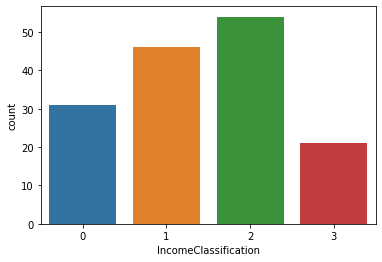

In [13]:
y = dt["IncomeClassification"]

sns.countplot(y)

target_temp = dt.IncomeClassification.value_counts()

print(target_temp)

In [14]:
print("Percentage of very low income countries: "+str(round(target_temp[0]*100/152,4)))
print("Percentage of low income countries: "+str(round(target_temp[1]*100/152,4)))
print("Percentage of medium income countries: "+str(round(target_temp[2]*100/152,4)))
print("Percentage of high income countries: "+str(round(target_temp[3]*100/152,4)))

Percentage of very low income countries: 20.3947
Percentage of low income countries: 30.2632
Percentage of medium income countries: 35.5263
Percentage of high income countries: 13.8158


## Underweight relation to income classification to understand

<BarContainer object of 152 artists>

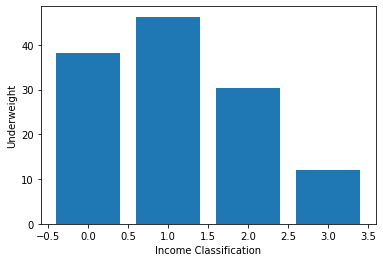

In [15]:
import matplotlib.pyplot as plt
x = dt['IncomeClassification']
y = dt['Underweight']
plt.xlabel("Income Classification")
plt.ylabel("Underweight")
plt.bar(x,y)

We notice that the lower the income, the higher the underweights present

<AxesSubplot:xlabel='IncomeClassification', ylabel='Underweight'>

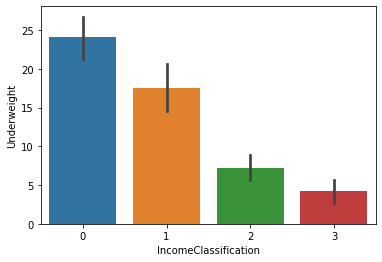

In [16]:
sns.barplot(dt["IncomeClassification"],y)

The following barplot further reaffirms the findings, that the income classification is inversely proportional to the underweights present in the country

### Analysing the Wasting feature

<AxesSubplot:xlabel='IncomeClassification', ylabel='Wasting'>

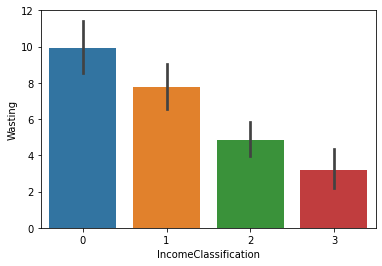

In [17]:
sns.barplot(dt["IncomeClassification"],dt["Wasting"])

### We realize that income classification and the wasting ratre is inversely proportional too. This helps us understand the data further

### Analysing the Stunting feature

<AxesSubplot:xlabel='IncomeClassification', ylabel='Stunting'>

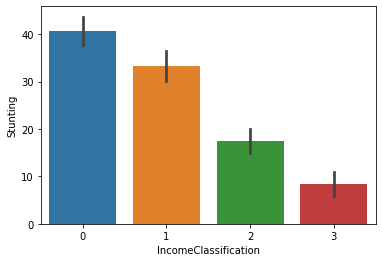

In [18]:
sns.barplot(dt["IncomeClassification"],dt["Stunting"])

We see that lower the income, higher the cases of stunting occuring. Stunting is the term used to define the stunt or lack of growth in an individual due to external features like bad diet or lack of food or resources for the body

## Analysing the Overweight feature

<AxesSubplot:xlabel='IncomeClassification', ylabel='Overweight'>

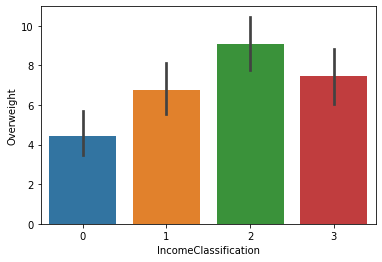

In [19]:
sns.barplot(dt["IncomeClassification"],dt["Overweight"])

### We observe that income classification and overweights are directly proportional to each other as, the more money they have the more food they eat and become overweight and in turn eat junk food

<AxesSubplot:>

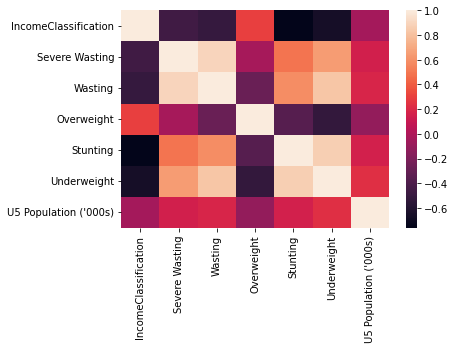

In [20]:
sns.heatmap(dt.corr())

# Creation of the model

In [21]:
dt.isnull().sum()

Country                   0
IncomeClassification      0
Severe Wasting           12
Wasting                   2
Overweight                3
Stunting                  1
Underweight               2
U5 Population ('000s)     0
dtype: int64

In [22]:
dt = dt.fillna(value=0)

In [23]:
dt.isnull().sum()

Country                  0
IncomeClassification     0
Severe Wasting           0
Wasting                  0
Overweight               0
Stunting                 0
Underweight              0
U5 Population ('000s)    0
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

predictors = dt.drop(["IncomeClassification","Country"],axis=1)
target = dt["IncomeClassification"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.2,random_state=0)

In [25]:
X_train.shape

(121, 6)

In [26]:
X_test.shape

(31, 6)

In [27]:
Y_train.shape

(121,)

In [28]:
Y_test.shape

(31,)

In [29]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
!pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()


lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [33]:
Y_pred_lr.shape

(31,)

In [34]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score of Logistic Regression model is: "+str(score_lr)+" %")

The accuracy score of Logistic Regression model is: 45.16 %


# Support Vector Machine (SVM)

In [35]:
from sklearnex.svm import SVC
# from sklearnex import patch_sklearn
patch_sklearn()



sv = SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [36]:
Y_pred_svm.shape

(31,)

In [37]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score from using Linear SVM is: "+str(score_svm)+" %")

The accuracy score from using Linear SVM is: 48.39 %


# K Nearest Neighbors

In [38]:
from sklearnex.neighbors import KNeighborsClassifier
from sklearnex import patch_sklearn
patch_sklearn()

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [39]:
Y_pred_knn.shape

(31,)

In [40]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy for KNN is: "+str(score_knn)+" %")

The accuracy for KNN is: 22.58 %


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [42]:
print(Y_pred_dt.shape)

(31,)


In [43]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy from Decision Tree is: "+str(score_dt)+" %")

The accuracy from Decision Tree is: 48.39 %


# Random Forest Classifier

In [44]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [45]:
Y_pred_rf.shape

(31,)

In [46]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy of Decision Tree is: "+str(score_rf)+" %")

The accuracy of Decision Tree is: 58.06 %


# XGBOOST

In [47]:
from sklearnex import patch_sklearn
patch_sklearn()
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [48]:
Y_pred_xgb.shape

(31,)

In [49]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 48.39 %


# Final Ouptut

In [50]:
scores = [score_lr,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 45.16 %
The accuracy score achieved using Support Vector Machine is: 48.39 %
The accuracy score achieved using K-Nearest Neighbors is: 22.58 %
The accuracy score achieved using Decision Tree is: 48.39 %
The accuracy score achieved using Random Forest is: 58.06 %
The accuracy score achieved using XGBoost is: 48.39 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

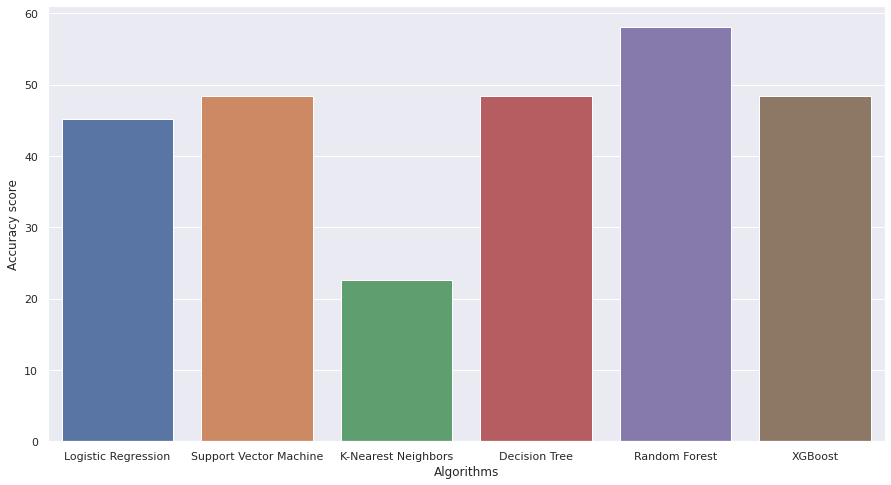

In [51]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)